In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os

import warnings
warnings.filterwarnings('ignore')


In [2]:

sns.set_style("darkgrid")
sns.set(rc={'axes.facecolor':'lightsteelblue', 'figure.facecolor':'white'})

In [3]:
#loading data
os.chdir('C:/Users/ELITEBOOK COI5/Desktop/Michael Work/Coding & Programming/Emissions Data')

emissions_data=pd.read_csv('annual-co-emissions-by-region.csv')

emissions_data.head()


,Entity,Code,Year,Annual CO₂ emissions (zero filled)
0,Afghanistan,AFG,1750,0.0
1,Afghanistan,AFG,1751,0.0
2,Afghanistan,AFG,1752,0.0
3,Afghanistan,AFG,1753,0.0
4,Afghanistan,AFG,1754,0.0


In [4]:
#Checking emissions data
emissions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73168 entries, 0 to 73167
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              73168 non-null  object 
 1   Code                                63376 non-null  object 
 2   Year                                73168 non-null  int64  
 3   Annual CO₂ emissions (zero filled)  73168 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [5]:
#describing summaries
emissions_data.describe()

,Year,Annual CO₂ emissions (zero filled)
count,73168.000000,7.316800e+04
mean,1885.500000,1.628068e+08
std,78.519643,1.193033e+09
min,1750.000000,0.000000e+00
25%,1817.750000,0.000000e+00
50%,1885.500000,0.000000e+00
75%,1953.250000,1.237424e+06
max,2021.000000,3.712385e+10


In [6]:
#Checking unique countries
emissions_data['Entity'].unique()

array(['Afghanistan', 'Africa', 'Africa (GCP)', 'Aland Islands',
       'Albania', 'Algeria', 'American Samoa', 'Andorra', 'Angola',
       'Anguilla', 'Antarctica', 'Antigua and Barbuda', 'Argentina',
       'Armenia', 'Aruba', 'Asia', 'Asia (GCP)',
       'Asia (excl. China and India)', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Central African Republic', 'Central America (GCP)', 'Chad',
       'Chile', 'China', 'Christmas Island', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', "Cote d'Ivoire", 'Croatia',
       'Cuba', 'Curacao', 'Cyprus', 'Czechia',
       'Democratic Republic of Congo', 'Denmar

In [7]:
#Merging data  with continent data
continents=pd.read_csv('continents.csv')

emissions_data_merged=emissions_data.merge(continents, on='Entity', how='left')

In [8]:
emissions_data_merged.head()

,Entity,Code_x,Year_x,Annual CO₂ emissions (zero filled),Code_y,Year_y,Continent
0,Afghanistan,AFG,1750,0.0,AFG,2015.0,Asia
1,Afghanistan,AFG,1751,0.0,AFG,2015.0,Asia
2,Afghanistan,AFG,1752,0.0,AFG,2015.0,Asia
3,Afghanistan,AFG,1753,0.0,AFG,2015.0,Asia
4,Afghanistan,AFG,1754,0.0,AFG,2015.0,Asia


In [9]:
emissions_data_merged.shape

(73168, 7)

emissions_data_merged.drop([[[[[[[[[[[[[[[[[[[]]]]]]]]]]]

In [10]:
emissions_data_merged.drop(['Code_y','Year_y'], axis=1, inplace=True)
emissions_data_merged.head()

,Entity,Code_x,Year_x,Annual CO₂ emissions (zero filled),Continent
0,Afghanistan,AFG,1750,0.0,Asia
1,Afghanistan,AFG,1751,0.0,Asia
2,Afghanistan,AFG,1752,0.0,Asia
3,Afghanistan,AFG,1753,0.0,Asia
4,Afghanistan,AFG,1754,0.0,Asia


In [11]:
regions=emissions_data_merged[emissions_data_merged['Continent'].isnull()]['Entity'].unique()

In [12]:
continents=emissions_data_merged['Continent'].unique()
print (continents)

['Asia' nan 'Europe' 'Africa' 'Oceania' 'North America' 'Antarctica'
 'South America']


In [13]:
#renaming columns
emissions_data_merged.rename(columns = {'Code_x':'Code', 'Annual CO₂ emissions (zero filled)':'Annual emissions',
                              'Year_x':'Year'}, inplace = True)

In [14]:
emissions_data_merged.head()

,Entity,Code,Year,Annual emissions,Continent
0,Afghanistan,AFG,1750,0.0,Asia
1,Afghanistan,AFG,1751,0.0,Asia
2,Afghanistan,AFG,1752,0.0,Asia
3,Afghanistan,AFG,1753,0.0,Asia
4,Afghanistan,AFG,1754,0.0,Asia


### Plotting

In [15]:
global_emissions=emissions_data_merged[emissions_data_merged['Entity']=='World']
global_emissions.head()

,Entity,Code,Year,Annual emissions,Continent
72080,World,OWID_WRL,1750,9350528.0,NaN
72081,World,OWID_WRL,1751,9350528.0,NaN
72082,World,OWID_WRL,1752,9354192.0,NaN
72083,World,OWID_WRL,1753,9354192.0,NaN
72084,World,OWID_WRL,1754,9357856.0,NaN


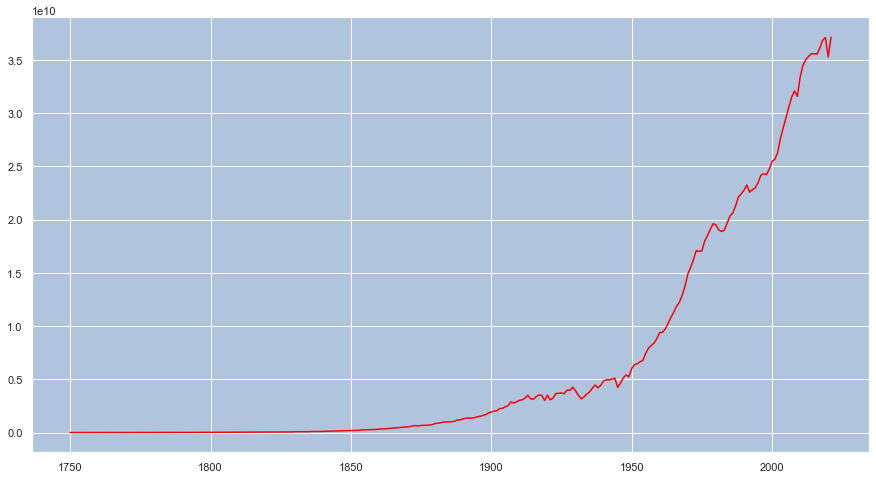

In [16]:
plt.figure(figsize=(15,8))
plt.plot(global_emissions.Year, global_emissions['Annual emissions'], color = 'red' )
plt.show()

In [17]:
global_emissions['Annual_Changes']=global_emissions['Annual emissions'].diff()
global_emissions.head()

,Entity,Code,Year,Annual emissions,Continent,Annual_Changes
72080,World,OWID_WRL,1750,9350528.0,NaN,NaN
72081,World,OWID_WRL,1751,9350528.0,NaN,0.0
72082,World,OWID_WRL,1752,9354192.0,NaN,3664.0
72083,World,OWID_WRL,1753,9354192.0,NaN,0.0
72084,World,OWID_WRL,1754,9357856.0,NaN,3664.0


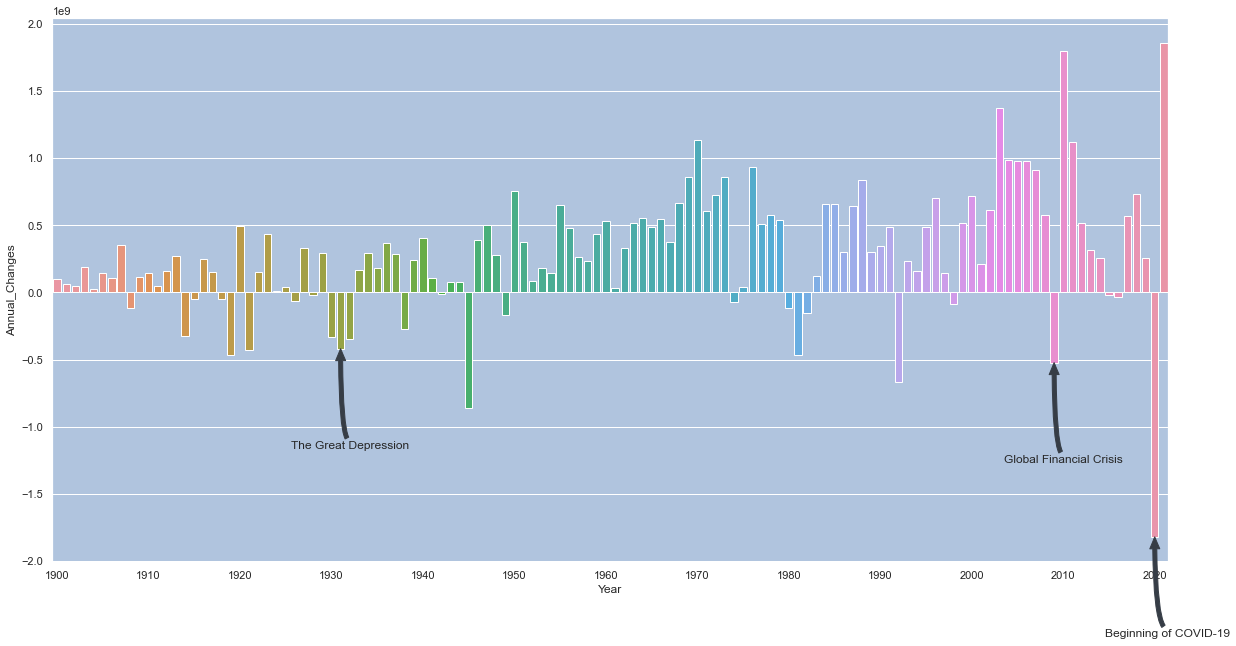

In [18]:


plt.figure(figsize=(20,10))
ax=sns.barplot(data=global_emissions[global_emissions['Year']>=1900], x='Year', y='Annual_Changes')


# Adjust the label position
for i, label in enumerate(ax.get_xticklabels()):
    if i % 10 !=0:
        label.set_visible(False)
    

y_value1=global_emissions[global_emissions['Year']==2020]['Annual_Changes']

ax.annotate('Beginning of COVID-19',
            xy=(2020-1900, y_value1),
            xycoords='data',
            xytext=(-50,-100),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='#363d46', connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=12)

y_value2=global_emissions[global_emissions['Year']==2009]['Annual_Changes']
ax.annotate('Global Financial Crisis',
            xy=(2009-1900, y_value2),
            xycoords='data',
            xytext=(-50,-100),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='#363d46', connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=12)

y_value3=global_emissions[global_emissions['Year']==1931]['Annual_Changes']
ax.annotate('The Great Depression',
            xy=(1931-1900, y_value3),
            xycoords='data',
            xytext=(-50,-100),
            textcoords='offset points',
            arrowprops=dict(headwidth=10, width=4, color='#363d46', connectionstyle="angle3,angleA=0,angleB=-90"),
            fontsize=12)


#plt.tight_layout(False)
plt.show()

In [19]:
country_emissions=emissions_data_merged[~emissions_data_merged['Continent'].isnull()]
total_country_emissions=country_emissions.groupby('Entity').agg(Total_emissions=('Annual emissions', 'sum')).reset_index()
total_country_emissions.sort_values(by='Total_emissions',ascending=False).head(10)

,Entity,Total_emissions
220,United States,4.219069e+11
42,China,2.493528e+11
171,Russia,1.175476e+11
78,Germany,9.329050e+10
219,United Kingdom,7.850872e+10
103,Japan,6.671108e+10
94,India,5.710539e+10
72,France,3.910576e+10
37,Canada,3.411540e+10
217,Ukraine,3.078473e+10


In [20]:
top_ten_countries=list(total_country_emissions.sort_values(by='Total_emissions',ascending=False)['Entity'].head(10))
print(top_ten_countries)

['United States', 'China', 'Russia', 'Germany', 'United Kingdom', 'Japan', 'India', 'France', 'Canada', 'Ukraine']


In [21]:
total_country_emissions_top_ten=total_country_emissions.sort_values(by='Total_emissions',ascending=False).head(10)

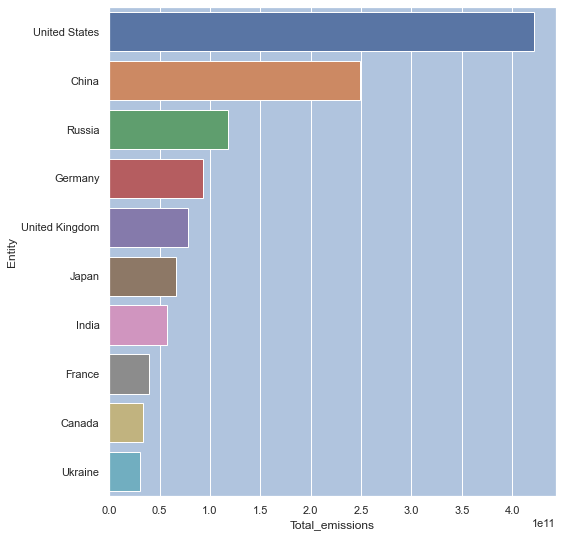

In [22]:
plt.figure(figsize=(8,9))
sns.barplot(data=total_country_emissions_top_ten, x='Total_emissions', y='Entity')
plt.show()

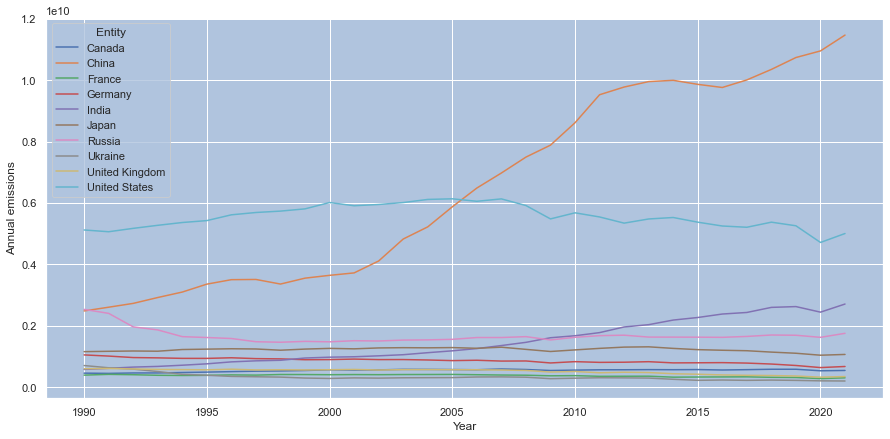

In [23]:
#Line graph
plt.figure(figsize=(15, 7))
sns.lineplot(data=emissions_data_merged[(emissions_data_merged['Entity'].isin(top_ten_countries))& (emissions_data_merged['Year']>=1990) ],
             x='Year', y='Annual emissions',
             hue='Entity')
plt.show()

In [24]:
top_five_countries=list(total_country_emissions.sort_values(by='Total_emissions',ascending=False)['Entity'].head(5))

In [25]:
def entity_filter(entity):
    entity_data=emissions_data_merged[emissions_data_merged['Entity']==entity]['Annual emissions'].reset_index(drop=True)
    return entity_data

In [26]:
top_five_countries_emissions={}
for entity in top_five_countries:
    top_five_countries_emissions[entity]=entity_filter(entity)
    
print (top_five_countries_emissions['China'])

0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      0.000000e+00
4      0.000000e+00
           ...     
267    1.001111e+10
268    1.035388e+10
269    1.074100e+10
270    1.095621e+10
271    1.147237e+10
Name: Annual emissions, Length: 272, dtype: float64


In [27]:
top_five_countries_emissions['Year']=emissions_data_merged['Year'].unique()
print(len(top_five_countries_emissions['United Kingdom']))

272


In [28]:
top_five_countries_emissions=pd.DataFrame(top_five_countries_emissions)
top_five_countries_emissions.head()

,United States,China,Russia,Germany,United Kingdom,Year
0,0.0,0.0,0.0,0.0,9350528.0,1750
1,0.0,0.0,0.0,0.0,9350528.0,1751
2,0.0,0.0,0.0,0.0,9354192.0,1752
3,0.0,0.0,0.0,0.0,9354192.0,1753
4,0.0,0.0,0.0,0.0,9357856.0,1754


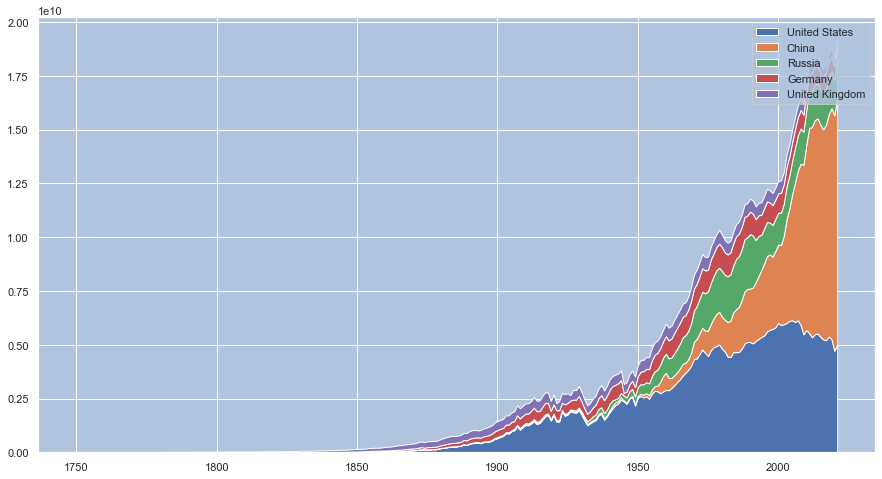

In [29]:
plt.figure(figsize=(15,8))
plt.stackplot(top_five_countries_emissions.Year, top_five_countries_emissions['United States'], 
              top_five_countries_emissions['China'],
             top_five_countries_emissions['Russia'],
             top_five_countries_emissions['Germany'],
             top_five_countries_emissions['United Kingdom'],
             labels=top_five_countries)

plt.legend()
plt.show()


In [30]:
import circlify

In [31]:
total_country_emissions_top_twenty=total_country_emissions.sort_values(by='Total_emissions',ascending=False).head(20)

In [32]:
circles = circlify.circlify(total_country_emissions_top_twenty.Total_emissions.tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
circles.reverse()

In [33]:
pal_ = list(sns.color_palette(palette='plasma_r',
                              n_colors=len(total_country_emissions_top_twenty.Entity)).as_hex())

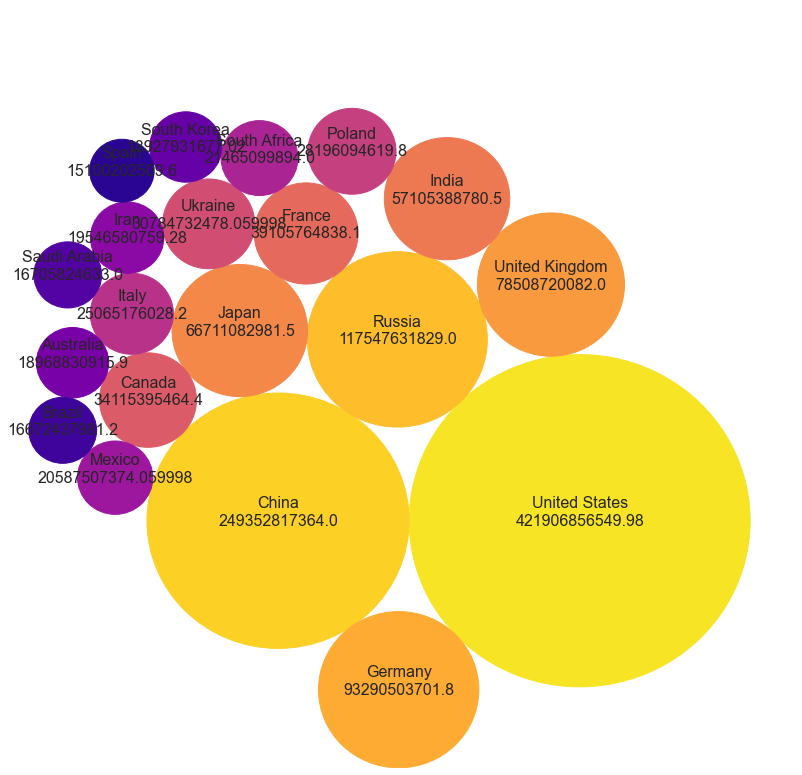

In [34]:
#create a laebls list for each bubble 
label = [i+'<br>'+str(j)+'<br>' for i,j in zip(total_country_emissions_top_twenty.Entity,
                                                  total_country_emissions_top_twenty.Total_emissions          )
                                                            ]
fig, ax = plt.subplots(figsize=(14,14), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# print circles
for circle, note, color in zip(circles, label, pal_):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=1, color = color))
    plt.annotate(note.replace('<br>','\n'), (x,y), size=16, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [35]:
per_capita_data=pd.read_csv('carbon-emission-intensity-vs-gdp-per-capita.csv')
per_capita_data.head()

,Entity,Code,Year,CO2 emissions (kg per 2017 PPP $ of GDP),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates),Continent
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN,Asia
1,Afghanistan,AFG,2002,0.040907,1189.784668,21000258.0,NaN
2,Afghanistan,AFG,2003,0.046130,1235.810059,22645136.0,NaN
3,Afghanistan,AFG,2004,0.038074,1200.277954,23553554.0,NaN
4,Afghanistan,AFG,2005,0.049679,1286.793701,24411196.0,NaN


In [36]:
per_capita_data.drop('Continent', axis=1, inplace=True)
per_capita_data.head()

,Entity,Code,Year,CO2 emissions (kg per 2017 PPP $ of GDP),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates)
0,Abkhazia,OWID_ABK,2015,NaN,NaN,NaN
1,Afghanistan,AFG,2002,0.040907,1189.784668,21000258.0
2,Afghanistan,AFG,2003,0.046130,1235.810059,22645136.0
3,Afghanistan,AFG,2004,0.038074,1200.277954,23553554.0
4,Afghanistan,AFG,2005,0.049679,1286.793701,24411196.0


In [37]:
emissions_data_merged2=emissions_data_merged.merge(per_capita_data, on=['Entity','Year'], how='left')
emissions_data_merged2.head()

,Entity,Code_x,Year,Annual emissions,Continent,Code_y,CO2 emissions (kg per 2017 PPP $ of GDP),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates)
0,Afghanistan,AFG,1750,0.0,Asia,AFG,NaN,NaN,2802568.0
1,Afghanistan,AFG,1751,0.0,Asia,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,Asia,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,Asia,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,Asia,NaN,NaN,NaN,NaN


In [38]:
emissions_data_merged2.tail()

,Entity,Code_x,Year,Annual emissions,Continent,Code_y,CO2 emissions (kg per 2017 PPP $ of GDP),"GDP per capita, PPP (constant 2017 international $)",Population (historical estimates)
73163,Zimbabwe,ZWE,2017,9596071.0,Africa,ZWE,0.189315,3795.642334,14751101.0
73164,Zimbabwe,ZWE,2018,11795478.0,Africa,ZWE,0.216616,3923.030518,15052191.0
73165,Zimbabwe,ZWE,2019,11114607.0,Africa,ZWE,NaN,3630.033936,15354606.0
73166,Zimbabwe,ZWE,2020,10607897.0,Africa,ZWE,NaN,3353.411377,15669663.0
73167,Zimbabwe,ZWE,2021,11296114.0,Africa,ZWE,NaN,NaN,15993525.0


In [39]:
emissions_data_merged2.shape

(73168, 9)

In [40]:
emissions_data_merged2.drop('Code_y', axis=1, inplace=True)

In [41]:
emissions_data_merged2.rename(columns={'Code_x':'Code'}, inplace=True)

In [42]:
emissions_data_merged2.rename(columns={'CO2 emissions (kg per 2017 PPP $ of GDP)':'emissions_kg_per_PPP', 
                                       'GDP per capita, PPP (constant 2017 international $)':'GDP_per_Capita',
                                       'Population (historical estimates)':'Population'}, inplace=True)

In [43]:
emissions_data_merged2['emissions_per_capita']= emissions_data_merged2['Annual emissions']*1000/emissions_data_merged2['Population']

In [44]:
def scatter_plot(df, x_column, y_column, size_column, hue_column):
    sns.scatterplot(data=df, x= x_column, y= y_column,
                     hue=hue_column,
                      size=size_column)
    plt.show()

In [45]:
def scatter_plot2(df, x_column, y_column,hue_column,size_column):
    plt.figure(figsize=(15,8))
    minsize = 10
    maxsize = 1000
    sns.scatterplot(data=df, x= x_column, y= y_column,hue=hue_column, size=size_column,sizes=(minsize, maxsize))
    plt.show()

In [46]:
country_emissions=emissions_data_merged2[~emissions_data_merged2['Continent'].isnull()]

In [47]:
#emissions_data_2019.head()

In [48]:
#scatter_plot2(emissions_data_2019, 'GDP_per_Capita', 'emissions_per_capita','Continent','Population')

In [49]:
#scatter_plot2(emissions_data_2019, 'Population', 'Annual emissions','Continent','Population')

In [50]:
#scatter_plot2(emissions_data_2019, 'Population', 'GDP_per_Capita','Continent','Population')

In [51]:
gdp_data=pd.read_csv('national-gdp.csv')

In [52]:
gdp_data.head()

,Entity,Code,Year,"GDP (output, multiple price benchmarks)"
0,Albania,ALB,1970,6697491500
1,Albania,ALB,1971,6958496300
2,Albania,ALB,1972,7246038000
3,Albania,ALB,1973,7536605700
4,Albania,ALB,1974,7855124000


In [53]:
emissions_data_merged2=emissions_data_merged2.merge(gdp_data, on=['Entity','Year'], how='left')
emissions_data_merged2.head()

,Entity,Code_x,Year,Annual emissions,Continent,emissions_kg_per_PPP,GDP_per_Capita,Population,emissions_per_capita,Code_y,"GDP (output, multiple price benchmarks)"
0,Afghanistan,AFG,1750,0.0,Asia,NaN,NaN,2802568.0,0.0,NaN,NaN
1,Afghanistan,AFG,1751,0.0,Asia,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,Asia,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,Asia,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,Asia,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
emissions_data_merged2.drop('Code_y', axis=1, inplace=True)

In [55]:
emissions_data_merged2.rename(columns ={'Code_x':'Code','GDP (output, multiple price benchmarks)':'GDP'}, inplace=True )
emissions_data_merged2.head()

,Entity,Code,Year,Annual emissions,Continent,emissions_kg_per_PPP,GDP_per_Capita,Population,emissions_per_capita,GDP
0,Afghanistan,AFG,1750,0.0,Asia,NaN,NaN,2802568.0,0.0,NaN
1,Afghanistan,AFG,1751,0.0,Asia,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752,0.0,Asia,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753,0.0,Asia,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754,0.0,Asia,NaN,NaN,NaN,NaN,NaN


In [56]:
country_emissions=emissions_data_merged2[~emissions_data_merged2['Continent'].isnull()]

In [57]:
def  country_annual_emissions(Year):
    country_annual_emissions=country_emissions[(country_emissions['Year']== Year) &(country_emissions['Annual emissions'] >0)]
    return country_annual_emissions

In [58]:
country_emissions_2017=country_annual_emissions(2017)
country_emissions_2017.head()

,Entity,Code,Year,Annual emissions,Continent,emissions_kg_per_PPP,GDP_per_Capita,Population,emissions_per_capita,GDP
267,Afghanistan,AFG,2017,9867969.0,Asia,0.098779,2058.400146,35643420.0,276.852474,NaN
1355,Albania,ALB,2017,5564149.0,Europe,0.152602,12770.963867,2879361.0,1932.424937,3.497494e+10
1627,Algeria,DZA,2017,166411380.0,Africa,0.298682,11737.401367,41136548.0,4045.341384,4.721880e+11
2171,Andorra,AND,2017,465328.0,Europe,NaN,NaN,73853.0,6300.732536,NaN
2443,Angola,AGO,2017,24304090.0,Africa,0.141476,7310.896484,30208634.0,804.541179,2.301513e+11


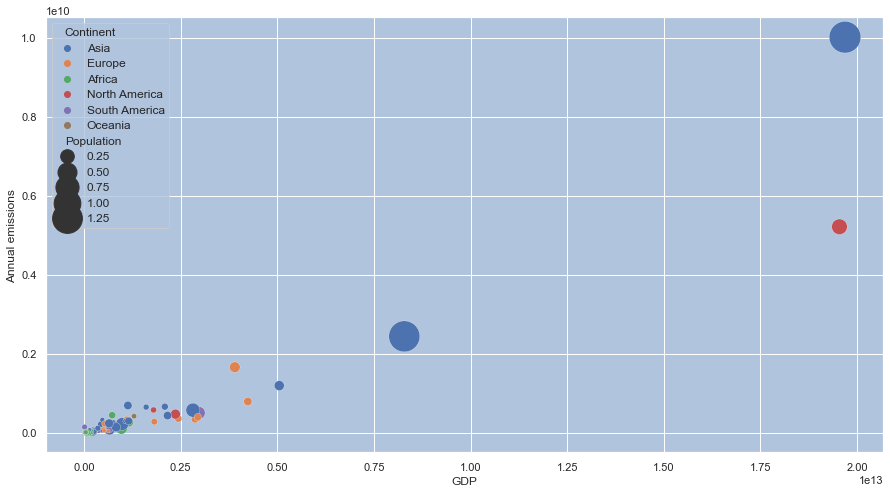

In [59]:
scatter_plot2(country_emissions_2017, 'GDP', 'Annual emissions','Continent','Population')

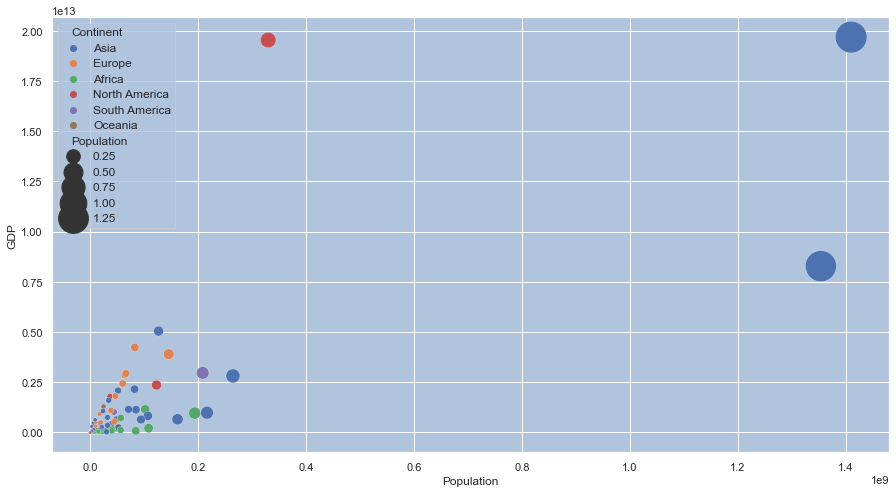

In [60]:
scatter_plot2(country_emissions_2017, 'Population', 'GDP','Continent','Population')

## Correlation

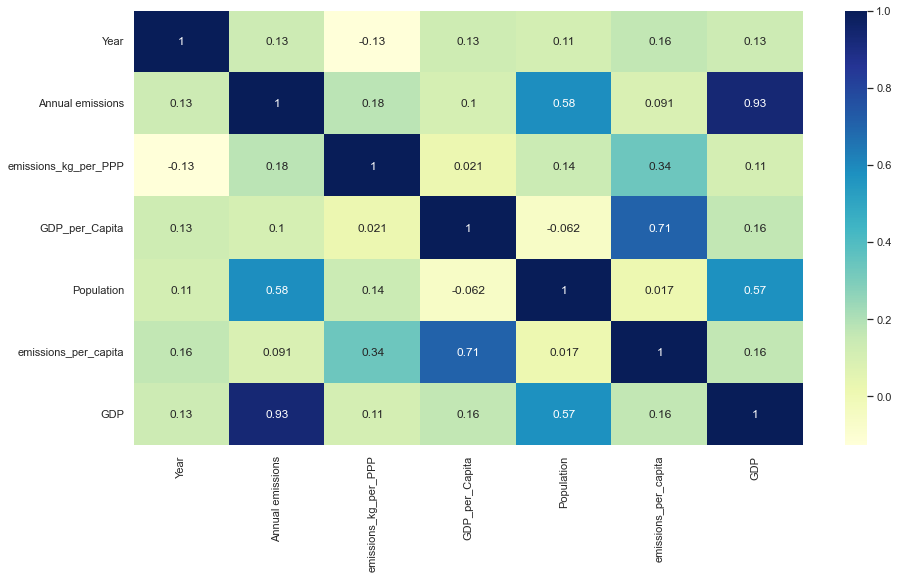

In [61]:
#Country Correlation
corr_matrix=country_emissions.corr()
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix, cmap="YlGnBu", annot=True)


In [62]:
country_emissions['comparision_cat']=country_emissions['Entity'].apply(lambda x: x if  x in(top_five_countries) else 'Other Countries')

In [63]:
country_emissions[country_emissions['Entity']=='China'].head(10)

,Entity,Code,Year,Annual emissions,Continent,emissions_kg_per_PPP,GDP_per_Capita,Population,emissions_per_capita,GDP,comparision_cat
13328,China,CHN,1750,0.0,Asia,NaN,NaN,178327216.0,0.0,NaN,China
13329,China,CHN,1751,0.0,Asia,NaN,NaN,NaN,NaN,NaN,China
13330,China,CHN,1752,0.0,Asia,NaN,NaN,NaN,NaN,NaN,China
13331,China,CHN,1753,0.0,Asia,NaN,NaN,NaN,NaN,NaN,China
13332,China,CHN,1754,0.0,Asia,NaN,NaN,NaN,NaN,NaN,China
13333,China,CHN,1755,0.0,Asia,NaN,NaN,NaN,NaN,NaN,China
13334,China,CHN,1756,0.0,Asia,NaN,NaN,NaN,NaN,NaN,China
13335,China,CHN,1757,0.0,Asia,NaN,NaN,NaN,NaN,NaN,China
13336,China,CHN,1758,0.0,Asia,NaN,NaN,NaN,NaN,NaN,China
13337,China,CHN,1759,0.0,Asia,NaN,NaN,NaN,NaN,NaN,China


In [64]:
country_emissions_total2=country_emissions.groupby('comparision_cat').agg(total_emmissions=('Annual emissions','sum')).reset_index()
country_emissions_total2.head()



,comparision_cat,total_emmissions
0,China,2.493528e+11
1,Germany,9.329050e+10
2,Other Countries,7.332119e+11
3,Russia,1.175476e+11
4,United Kingdom,7.850872e+10


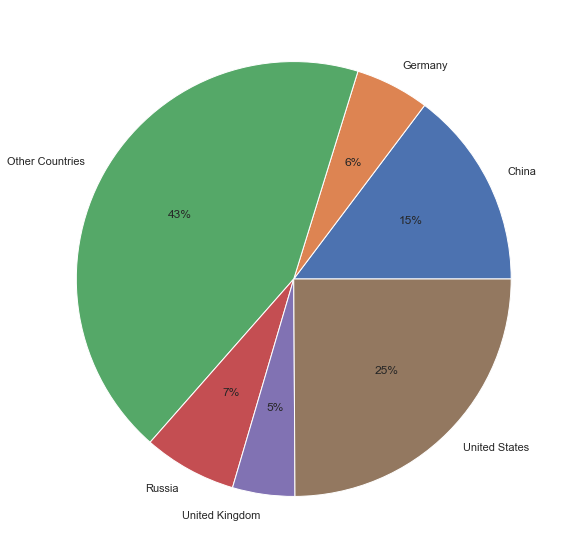

In [65]:
plt.figure(figsize=(10,10))
plt.pie(country_emissions_total2.total_emmissions, labels=country_emissions_total2.comparision_cat, 
        autopct='%.0f%%')

plt.show()

## Carbon Cycle

In [66]:
carbon_cycle=pd.read_csv('carbon_cycle\carbon_cycle_2018.txt', delimiter=';', skiprows=2)
carbon_cycle.head()

,lat,lon,emission 2018 (tons)
0,89.9,-180.0,5.254660
1,89.9,-167.5,0.015244
2,89.9,-167.4,0.017199
3,89.9,-167.3,0.006027
4,89.9,-167.2,0.013846


In [67]:
carbon_cycle.rename(columns={'emission 2018 (tons)':'emission'}, inplace=True)

In [68]:
carbon_cycle = carbon_cycle.sort_values('emission', ascending=False)
print(carbon_cycle[:10])

          lat    lon     emission
1012811  41.0  122.5  374564000.0
1359553  31.2  121.3  349304000.0
1398044  30.1  115.0  216871000.0
1391037  30.3  114.1   87207300.0
1600552  24.2  120.4   68252000.0
581914   53.4   59.0   59483700.0
1064953  39.5  116.2   59403600.0
1009326  41.1  123.4   59272400.0
502675   55.9   37.7   54053400.0
1627151  23.4   86.3   52283200.0


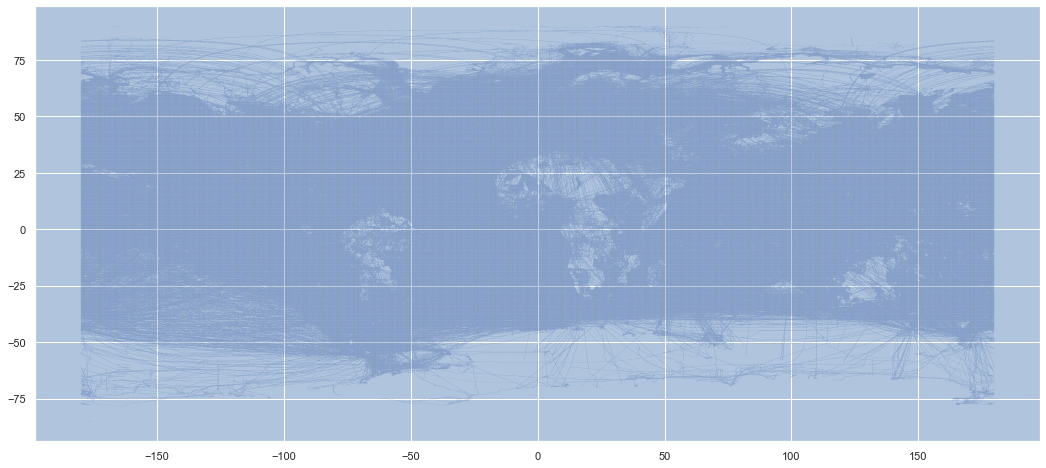

In [69]:
#Scatter plot

fig=plt.figure()
fig.set_size_inches(18, 8)
plt.scatter(carbon_cycle['lon'], carbon_cycle['lat'], s=0.03, edgecolors='none')

plt.show()



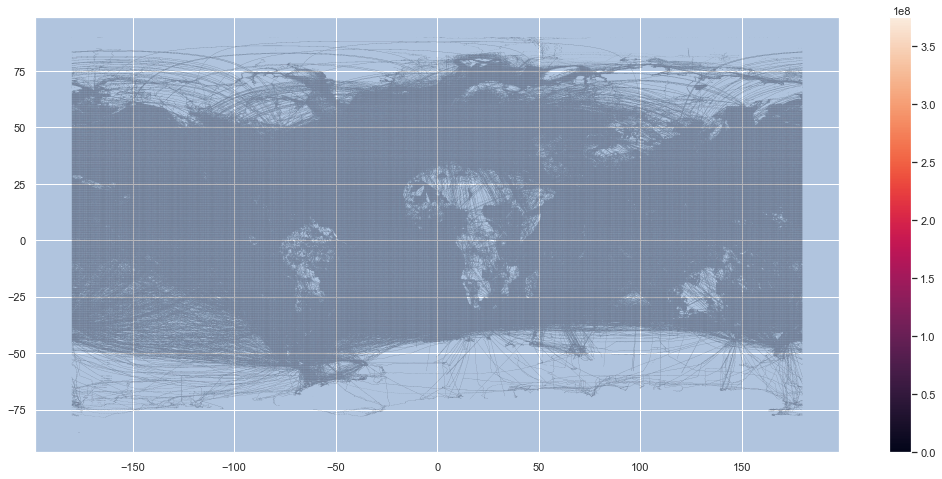

In [70]:
#Adding some colors
from matplotlib import colors

fig=plt.figure()
fig.set_size_inches(18,8)
cols=plt.scatter(carbon_cycle['lon'], carbon_cycle['lat'], s=0.02, c= carbon_cycle['emission'], edgecolors='none')
plt.colorbar(cols)
plt.show()



In [71]:
#Checking emissions  values
print(carbon_cycle.emission.value_counts())
print()
print("Min value: ", np.amin(carbon_cycle.emission))
print("Max value: ", np.amax(carbon_cycle.emission))

27.279800       1733
0.400113         910
0.299232         837
1.139410         801
54.667600        740
                ... 
1.785230           1
2.589660           1
34.013900          1
34199.800000       1
512.000000         1
Name: emission, Length: 2274163, dtype: int64

Min value:  2.39174e-08
Max value:  374564000.0


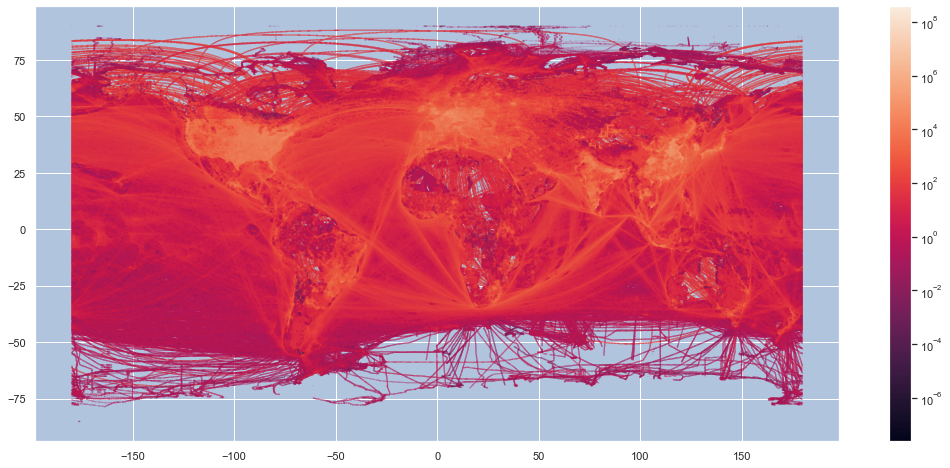

In [72]:

fig=plt.figure()
fig.set_size_inches(18, 8)
cols=plt.scatter(carbon_cycle['lon'], carbon_cycle['lat'],  s=0.005, c= carbon_cycle['emission'], norm=colors.LogNorm())
plt.colorbar(cols)
plt.show()

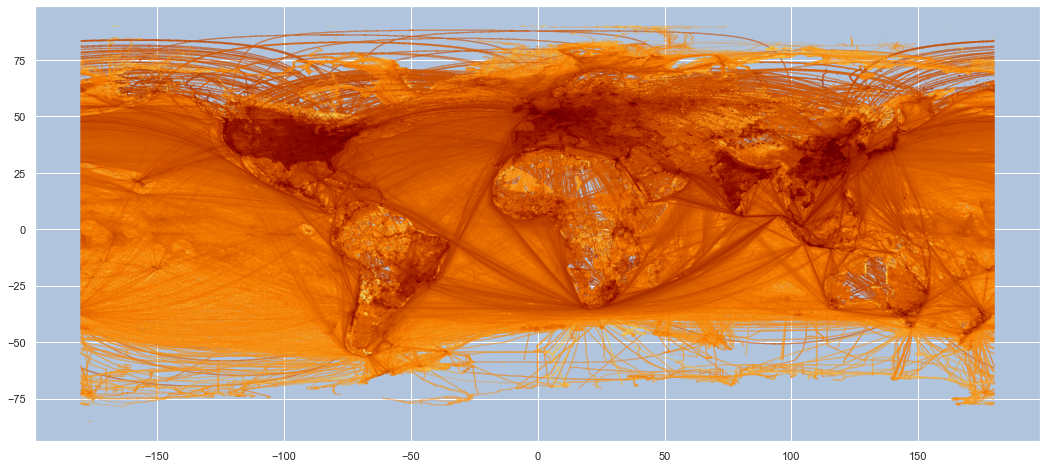

In [73]:

#Changing the color map
fig=plt.figure()
fig.set_size_inches(18,8)
plt.scatter(carbon_cycle['lon'], carbon_cycle['lat'], s=0.005, c=carbon_cycle['emission'], norm=colors.LogNorm(), cmap='afmhot_r')
plt.show()

In [74]:
country_emissions.head()

,Entity,Code,Year,Annual emissions,Continent,emissions_kg_per_PPP,GDP_per_Capita,Population,emissions_per_capita,GDP,comparision_cat
0,Afghanistan,AFG,1750,0.0,Asia,NaN,NaN,2802568.0,0.0,NaN,Other Countries
1,Afghanistan,AFG,1751,0.0,Asia,NaN,NaN,NaN,NaN,NaN,Other Countries
2,Afghanistan,AFG,1752,0.0,Asia,NaN,NaN,NaN,NaN,NaN,Other Countries
3,Afghanistan,AFG,1753,0.0,Asia,NaN,NaN,NaN,NaN,NaN,Other Countries
4,Afghanistan,AFG,1754,0.0,Asia,NaN,NaN,NaN,NaN,NaN,Other Countries


In [75]:
total_country_emissions=total_country_emissions=country_emissions.groupby('Entity').agg(Total_emissions=('Annual emissions', 'sum')).reset_index()
total_country_emissions.head()

,Entity,Total_emissions
0,Afghanistan,2.179931e+08
1,Albania,2.938390e+08
2,Algeria,4.862567e+09
3,American Samoa,0.000000e+00
4,Andorra,1.548449e+07


In [76]:
countries_long_lat=pd.read_csv('countries_long_and_lat.csv')
countries_long_lat.head()

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California


In [77]:
countries_long_lat=countries_long_lat[['country', 'latitude', 'longitude']]
countries_long_lat.head()

,country,latitude,longitude
0,Andorra,42.546245,1.601554
1,United Arab Emirates,23.424076,53.847818
2,Afghanistan,33.939110,67.709953
3,Antigua and Barbuda,17.060816,-61.796428
4,Anguilla,18.220554,-63.068615


In [78]:
countries_total_data=total_country_emissions.merge(countries_long_lat, left_on='Entity', right_on='country', how='left')
countries_total_data.head()

,Entity,Total_emissions,country,latitude,longitude
0,Afghanistan,2.179931e+08,Afghanistan,33.939110,67.709953
1,Albania,2.938390e+08,Albania,41.153332,20.168331
2,Algeria,4.862567e+09,Algeria,28.033886,1.659626
3,American Samoa,0.000000e+00,American Samoa,-14.270972,-170.132217
4,Andorra,1.548449e+07,Andorra,42.546245,1.601554


In [173]:
countries_total_data2=countries_total_data[~countries_total_data['latitude'].isnull()]
countries_total_data2=countries_total_data2[countries_total_data2['Total_emissions']>0]


In [79]:
import folium

In [232]:
#create map
m = folium.Map(location=[countries_total_data2['latitude'].mean(), countries_total_data2['longitude'].mean()], zoom_start=2)


In [186]:
min_val=min (countries_total_data2.Total_emissions)
max_val=max(countries_total_data2.Total_emissions)



In [192]:
# Define the color scheme for the circles
import branca
color_scale = branca.colormap.linear.YlOrRd_09.scale(min_val, max_val)
color_scale = color_scale.to_step(index=[min_val, (min_val+max_val)/2, max_val])


In [177]:
min_val

11.943980344077389

In [193]:
#Add a marker for each country
for i in range(0, len(countries_total_data2)):
      folium.CircleMarker([countries_total_data2.iloc[i]['latitude'], countries_total_data2.iloc[i]['longitude']], 
                          radius=(np.log(countries_total_data2.iloc[i]['Total_emissions'])),
                          color=color_scale(countries_total_data2.iloc[i]['Total_emissions']),
                          fill=True,
                         fill_color=color_scale(countries_total_data2.iloc[i]['Total_emissions'])
                         ) .add_to(m)
        

In [101]:
from IPython.display import display

In [197]:
from folium.plugins import HeatMap


In [199]:
countries_total_data3=countries_total_data2


In [200]:
countries_total_data3['latitude'] = countries_total_data3['latitude'].astype(float)
countries_total_data3['longitude'] = countries_total_data3['longitude'].astype(float)

In [201]:
heat_data = [[row['latitude'],row['longitude']] for index, row in countries_total_data3.iterrows()]

In [209]:
locations = countries_total_data3[['latitude', 'longitude']].values.tolist()

In [231]:
weight =  np.log(countries_total_data3['Total_emissions']).values.tolist()

In [233]:

folium.plugins.HeatMap(locations, weight=weight,  name='Heatmap', overlay=True).add_to(m)

# Add a layer control to the map
folium.LayerControl().add_to(m)

In [234]:
display(m)

In [235]:
emissions_data_merged.()

SyntaxError: invalid syntax (<ipython-input-235-b73a83c31332>, line 1)

In [237]:
emissions_data_merged2.tail()

,Entity,Code,Year,Annual emissions,Continent,emissions_kg_per_PPP,GDP_per_Capita,Population,emissions_per_capita,GDP
73163,Zimbabwe,ZWE,2017,9596071.0,Africa,0.189315,3795.642334,14751101.0,650.532526,4.431674e+10
73164,Zimbabwe,ZWE,2018,11795478.0,Africa,0.216616,3923.030518,15052191.0,783.638608,4.342090e+10
73165,Zimbabwe,ZWE,2019,11114607.0,Africa,NaN,3630.033936,15354606.0,723.861426,4.082657e+10
73166,Zimbabwe,ZWE,2020,10607897.0,Africa,NaN,3353.411377,15669663.0,676.970334,NaN
73167,Zimbabwe,ZWE,2021,11296114.0,Africa,NaN,NaN,15993525.0,706.292953,NaN


In [278]:
def  top_ten_yearly_emissions_per_capita(year):
    top_ten_countries= country_emissions[country_emissions['Year']==year][['Entity','Continent',  'emissions_per_capita']]\
                        .sort_values(by='emissions_per_capita', ascending=False ).head(10)
    plt.figure(figsize=(8,9))
    ax =sns.barplot(data=top_ten_countries , x='emissions_per_capita', y='Entity', hue='Continent')
   
       

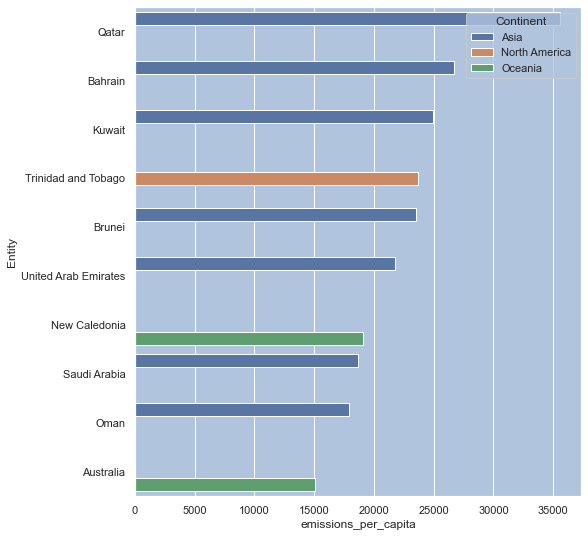

In [279]:
top_ten_yearly_emissions_per_capita(2021)

In [245]:
country_emissions.head()

,Entity,Code,Year,Annual emissions,Continent,emissions_kg_per_PPP,GDP_per_Capita,Population,emissions_per_capita,GDP,comparision_cat
0,Afghanistan,AFG,1750,0.0,Asia,NaN,NaN,2802568.0,0.0,NaN,Other Countries
1,Afghanistan,AFG,1751,0.0,Asia,NaN,NaN,NaN,NaN,NaN,Other Countries
2,Afghanistan,AFG,1752,0.0,Asia,NaN,NaN,NaN,NaN,NaN,Other Countries
3,Afghanistan,AFG,1753,0.0,Asia,NaN,NaN,NaN,NaN,NaN,Other Countries
4,Afghanistan,AFG,1754,0.0,Asia,NaN,NaN,NaN,NaN,NaN,Other Countries


In [275]:
import matplotlib 
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.2.1


In [273]:
pip install matplotlib --upgrade

Note: you may need to restart the kernel to use updated packages.


'c:\users\elitebook' is not recognized as an internal or external command,
operable program or batch file.


In [282]:
Continents=country_emissions['Continent'].unique()

In [289]:
continent_emissions=country_emissions.groupby(['Year','Continent']).agg(Total_emissions=('Annual emissions','sum')).reset_index()

In [290]:
continent_emissions.head()

,Year,Continent,Total_emissions
0,1750,Africa,0.0
1,1750,Antarctica,0.0
2,1750,Asia,0.0
3,1750,Europe,9350528.0
4,1750,North America,0.0


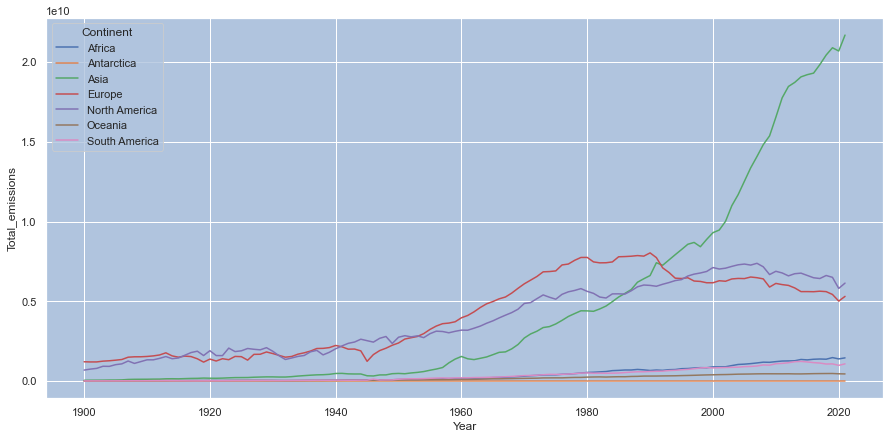

In [296]:
#Line graph
plt.figure(figsize=(15, 7))
sns.lineplot(data=continent_emissions[continent_emissions['Year']>=1900],
             x='Year', y='Total_emissions',
             hue='Continent')
plt.show()

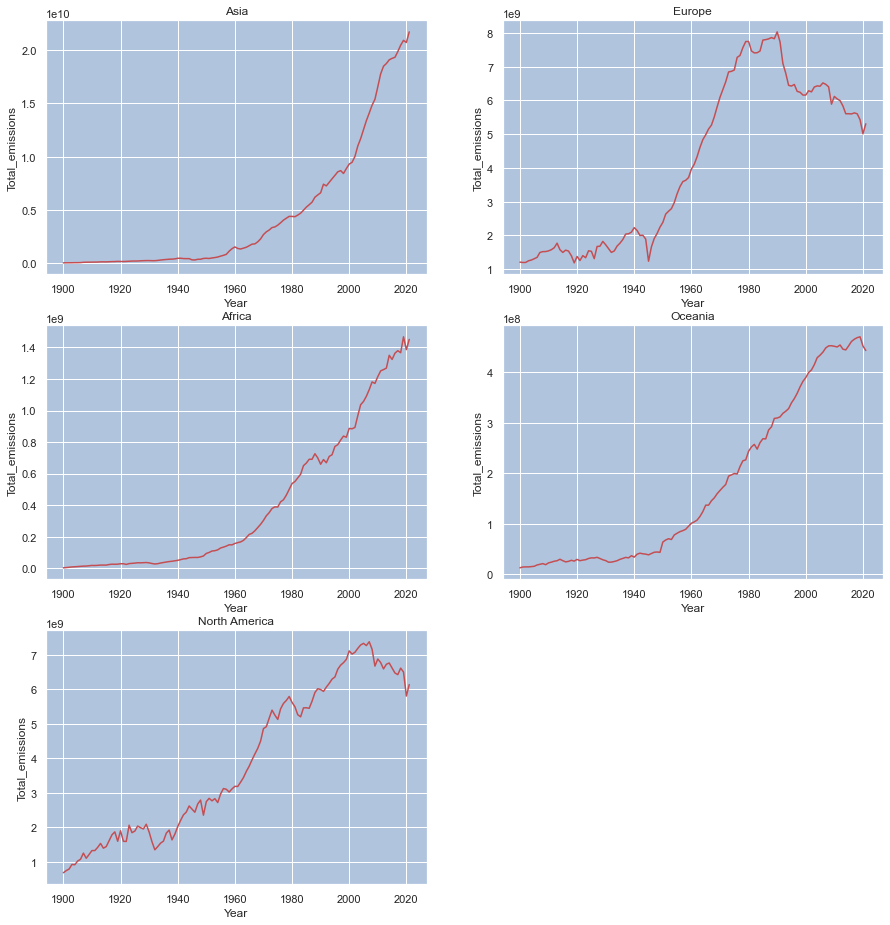

In [312]:
f, axes = plt.subplots(3, 2, figsize=(15, 15))
f.delaxes(ax = axes[2,1])


for continent, ax in zip(Continents, axes.flatten()[:5]):
   
    sns.lineplot(data=continent_emissions[(continent_emissions['Year']>=1900) &(continent_emissions['Continent']==continent)],
                                         x='Year',
                                         y='Total_emissions',
                                         ax=ax, 
                                         color='r').set(title= continent)
    plt.subplots_adjust(top=0.9, bottom=0.1)

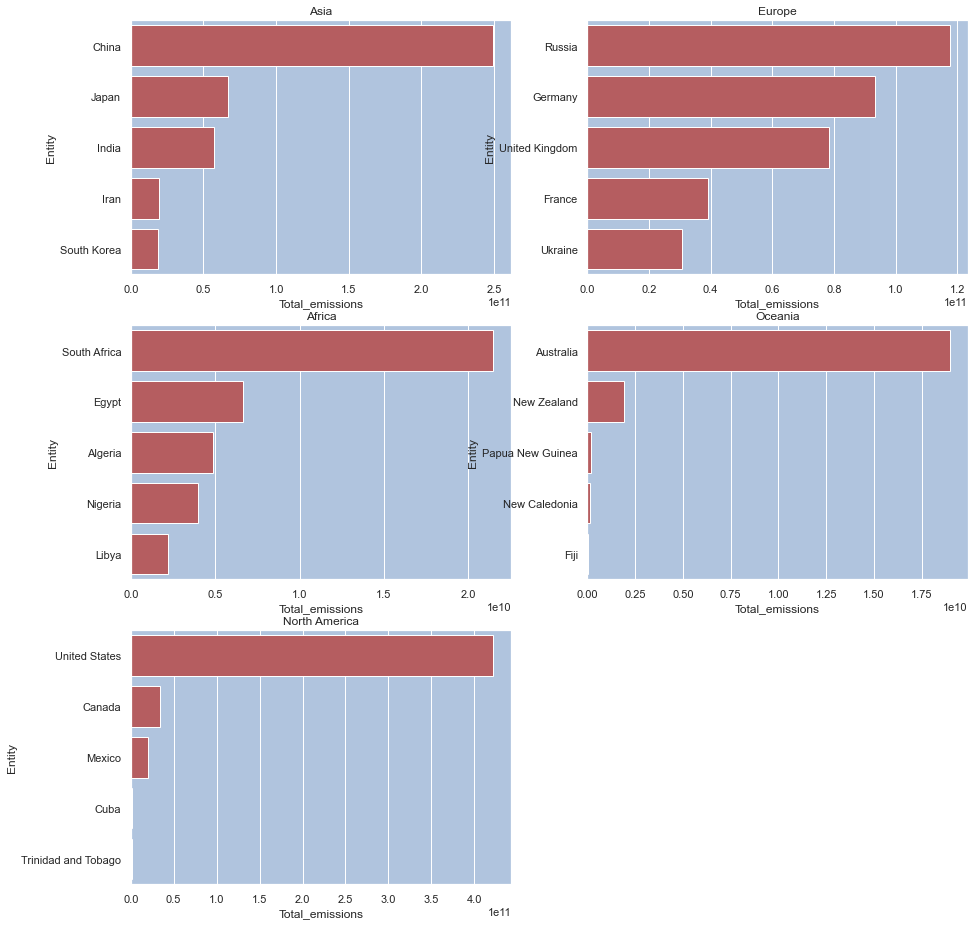

In [321]:
f, axes = plt.subplots(3, 2, figsize=(15, 15))
f.delaxes(ax = axes[2,1])


for continent, ax in zip(Continents, axes.flatten()[:5]):
    emissions_data_by_continent=country_emissions[country_emissions['Continent']==continent].groupby('Entity').agg(Total_emissions=('Annual emissions', 'sum'))\
    .reset_index().sort_values(by='Total_emissions', ascending=False).head(5)
   
    sns.barplot(data=emissions_data_by_continent,
                 x='Total_emissions',
                 y='Entity',
                 ax=ax, 
                 color='r').set(title= continent)
    plt.subplots_adjust(top=0.9, bottom=0.1)

## TIME SERIES ANALYSIS

In [362]:
global_data=emissions_data_merged2[(emissions_data_merged2['Entity']=='World') & (emissions_data_merged2['Year']>=1900)]
global_data.head()

,Entity,Code,Year,Annual emissions,Continent,emissions_kg_per_PPP,GDP_per_Capita,Population,emissions_per_capita,GDP
72230,World,OWID_WRL,1900,1.952210e+09,NaN,NaN,NaN,1.647405e+09,1185.020967,NaN
72231,World,OWID_WRL,1901,2.016744e+09,NaN,NaN,NaN,1.658786e+09,1215.795669,NaN
72232,World,OWID_WRL,1902,2.067684e+09,NaN,NaN,NaN,1.672564e+09,1236.235880,NaN
72233,World,OWID_WRL,1903,2.254095e+09,NaN,NaN,NaN,1.687013e+09,1336.145638,NaN
72234,World,OWID_WRL,1904,2.279749e+09,NaN,NaN,NaN,1.701647e+09,1339.730484,NaN


In [363]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [364]:
global_data.dtypes

Entity                   object
Code                     object
Year                      int64
Annual emissions        float64
Continent                object
emissions_kg_per_PPP    float64
GDP_per_Capita          float64
Population              float64
emissions_per_capita    float64
GDP                     float64
dtype: object

In [365]:
#Convert year tp datetome format
global_data['Year']=pd.to_datetime(global_data['Year'], format="%Y")
dd_days=timedelta(days=364)

global_data['Year']=global_data['Year'].apply(lambda x: x + add_days)


In [366]:
#Set the index to the year column
global_data.set_index('Year', inplace=True)

In [333]:
from datetime import  timedelta

In [367]:
global_data.head()

,Entity,Code,Annual emissions,Continent,emissions_kg_per_PPP,GDP_per_Capita,Population,emissions_per_capita,GDP
Year,,,,,,,,,
1900-12-31,World,OWID_WRL,1.952210e+09,NaN,NaN,NaN,1.647405e+09,1185.020967,NaN
1901-12-31,World,OWID_WRL,2.016744e+09,NaN,NaN,NaN,1.658786e+09,1215.795669,NaN
1902-12-31,World,OWID_WRL,2.067684e+09,NaN,NaN,NaN,1.672564e+09,1236.235880,NaN
1903-12-31,World,OWID_WRL,2.254095e+09,NaN,NaN,NaN,1.687013e+09,1336.145638,NaN
1904-12-30,World,OWID_WRL,2.279749e+09,NaN,NaN,NaN,1.701647e+09,1339.730484,NaN


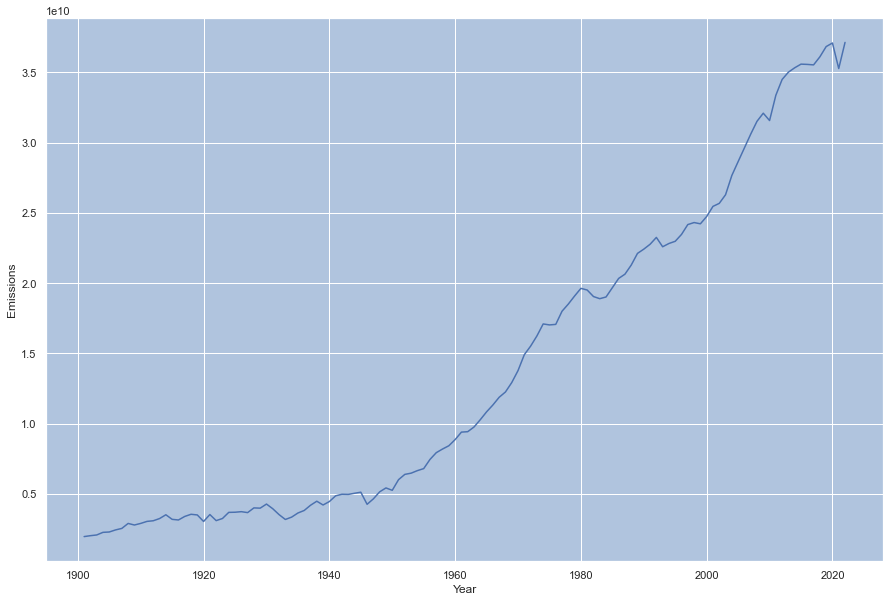

In [368]:
#Plot the data
plt.figure(figsize=(15, 10))
plt.plot(global_data['Annual emissions'])
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.show()


In [371]:
global_data = global_data.resample('A').mean()

In [373]:
global_data["Annual emissions"] = np.log(global_data["Annual emissions"])

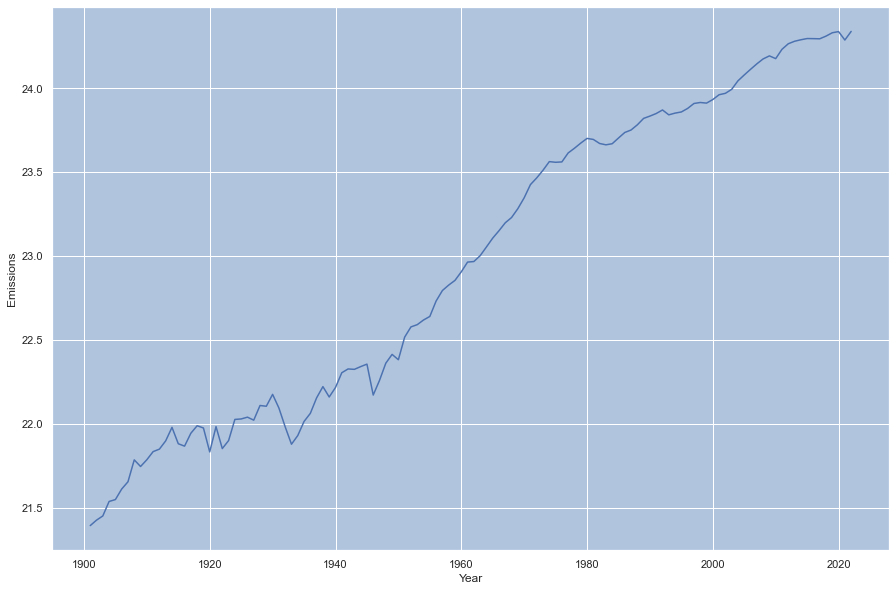

In [377]:
plt.figure(figsize=(15, 10))
plt.plot(global_data['Annual emissions'])
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.show()

In [379]:
global_data["emissions_smooth"] = global_data["Annual emissions"].rolling(window=5).mean()

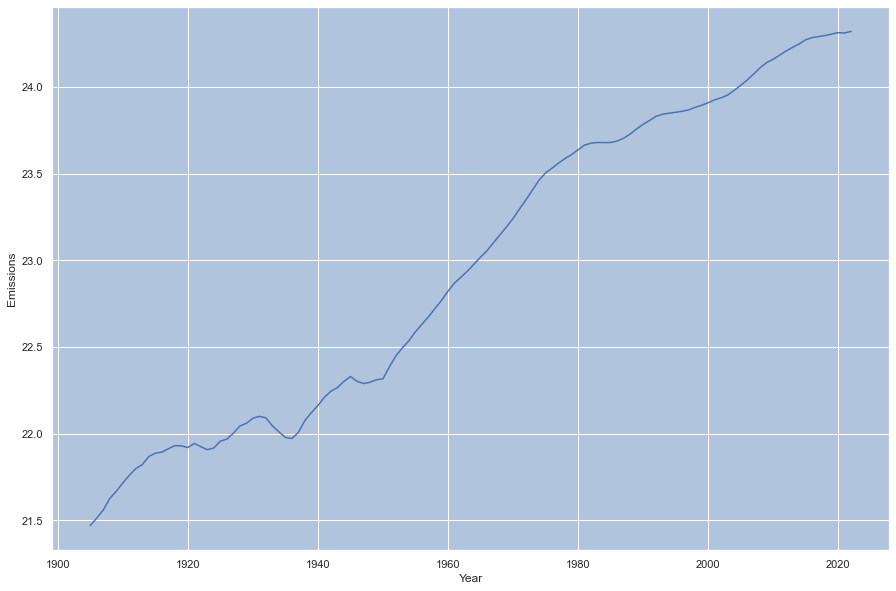

In [380]:
plt.figure(figsize=(15, 10))
plt.plot(global_data['emissions_smooth'])
plt.xlabel('Year')
plt.ylabel('Emissions')
plt.show()

In [381]:
# Fit the exponential smoothing model
model = ExponentialSmoothing(global_data["emissions_smooth"])
fit = model.fit()

c:\users\elitebook coi5\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


In [375]:
# Forecast the next 5 years
forecast = fit.forecast(steps=5)
print("Forecast for the next 5 years: ", forecast)

Forecast for the next 5 years:  2022-12-31    24.337525
2023-12-31    24.337525
2024-12-31    24.337525
2025-12-31    24.337525
2026-12-31    24.337525
Freq: A-DEC, dtype: float64


In [361]:
global_data2.tail()

,Entity,Code,Annual emissions,Continent,emissions_kg_per_PPP,GDP_per_Capita,Population,emissions_per_capita,GDP
Year,,,,,,,,,
2021-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [358]:
#Decomplse the time-series
result=seasonal_decompose(global_data['Annual emissions'], model='multiplicative', freq=5)
result.plot()
plt.show()

result = seasonal_decompose(data["emissions"], model='multiplicative', freq=12)

TypeError: seasonal_decompose() got an unexpected keyword argument 'freq'

In [ ]:


from statsmodels.tsa.holtwinters import ExponentialSmoothing
import pandas as pd

# Load data
data = pd.read_csv("emissions_data.csv")

# Fit the exponential smoothing model
model = ExponentialSmoothing(data["emissions"])
fit = model.fit()

# Forecast the next 5 years
forecast = fit.forecast(steps=5)
print("Forecast for the next 5 years: ", forecast)

## Regression Analysis

In [446]:
global_data=emissions_data_merged2[(emissions_data_merged2['Entity']=='World') & (emissions_data_merged2['Year']>=1900)]
global_data.tail()

,Entity,Code,Year,Annual emissions,Continent,emissions_kg_per_PPP,GDP_per_Capita,Population,emissions_per_capita,GDP
72347,World,OWID_WRL,2017,3.609674e+10,NaN,0.273578,16211.049805,7.599822e+09,4749.681690,NaN
72348,World,OWID_WRL,2018,3.682651e+10,NaN,0.269579,16607.765625,7.683790e+09,4792.753426,NaN
72349,World,OWID_WRL,2019,3.708256e+10,NaN,NaN,16897.171875,7.764951e+09,4775.633460,NaN
72350,World,OWID_WRL,2020,3.526409e+10,NaN,NaN,16185.165039,7.840953e+09,4497.423560,NaN
72351,World,OWID_WRL,2021,3.712385e+10,NaN,NaN,NaN,7.909295e+09,4693.698934,NaN


In [447]:
global_data['Year']=pd.to_datetime(global_data['Year'], format="%Y")

In [448]:
global_data['Year']=global_data['Year'].apply(lambda x: x + add_days)


In [427]:
from prophet import Prophet

In [449]:
global_data = global_data.rename(columns={'Year': 'ds', 'Annual emissions': 'y'})

In [450]:
global_data.head()

,Entity,Code,ds,y,Continent,emissions_kg_per_PPP,GDP_per_Capita,Population,emissions_per_capita,GDP
72230,World,OWID_WRL,1900-12-31,1.952210e+09,NaN,NaN,NaN,1.647405e+09,1185.020967,NaN
72231,World,OWID_WRL,1901-12-31,2.016744e+09,NaN,NaN,NaN,1.658786e+09,1215.795669,NaN
72232,World,OWID_WRL,1902-12-31,2.067684e+09,NaN,NaN,NaN,1.672564e+09,1236.235880,NaN
72233,World,OWID_WRL,1903-12-31,2.254095e+09,NaN,NaN,NaN,1.687013e+09,1336.145638,NaN
72234,World,OWID_WRL,1904-12-30,2.279749e+09,NaN,NaN,NaN,1.701647e+09,1339.730484,NaN


In [451]:
# Instantiate Prophet model
model = Prophet()


In [452]:
model.fit(global_data)

15:06:02 - cmdstanpy - INFO - Chain [1] start processing
15:06:03 - cmdstanpy - INFO - Chain [1] done processing


In [453]:
 # Create a dataframe to hold predictions
future=model.make_future_dataframe(periods=5, freq='Y')



In [454]:
#Make predictions
forecast = model.predict(future)


In [455]:
# Print the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']])

            ds          yhat    yhat_lower    yhat_upper
0   1900-12-31  2.129405e+09  1.268930e+09  2.993140e+09
1   1901-12-31  2.215117e+09  1.416580e+09  3.081731e+09
2   1902-12-31  2.300269e+09  1.380727e+09  3.149844e+09
3   1903-12-31  2.384826e+09  1.514106e+09  3.249030e+09
4   1904-12-30  2.468756e+09  1.562111e+09  3.339651e+09
..         ...           ...           ...           ...
122 2022-12-31  3.872766e+10  3.785595e+10  3.959127e+10
123 2023-12-31  3.929807e+10  3.835466e+10  4.016702e+10
124 2024-12-31  3.976098e+10  3.890119e+10  4.066947e+10
125 2025-12-31  4.033255e+10  3.948760e+10  4.122988e+10
126 2026-12-31  4.090356e+10  3.998192e+10  4.177146e+10

[127 rows x 4 columns]


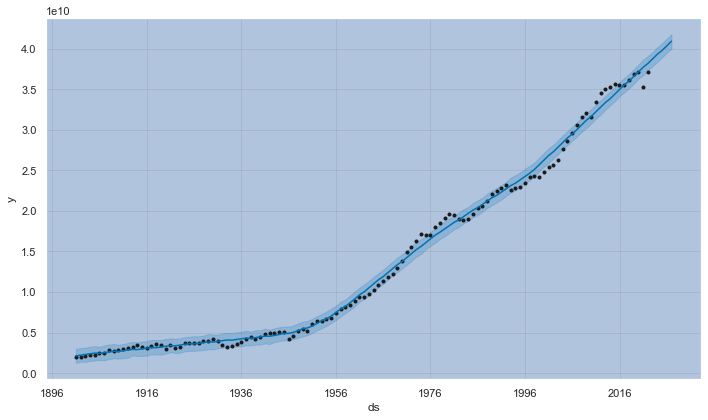

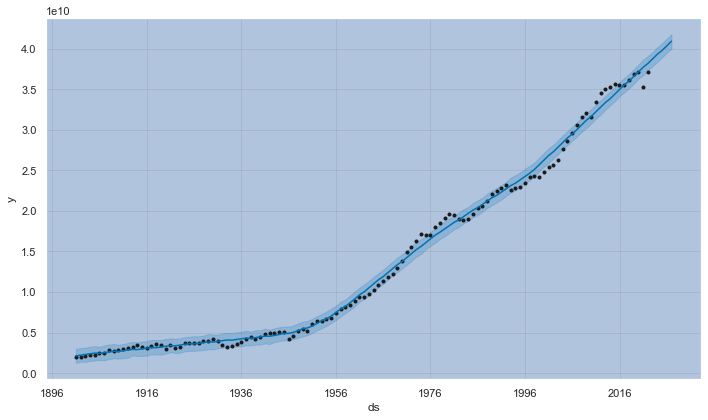

In [456]:
# Plot the forecast
model.plot(forecast)

In [457]:
# Print the model summary
print(model.summary())

AttributeError: 'Prophet' object has no attribute 'summary'

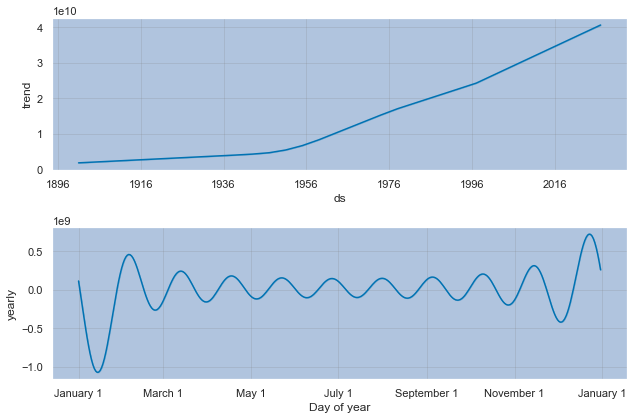

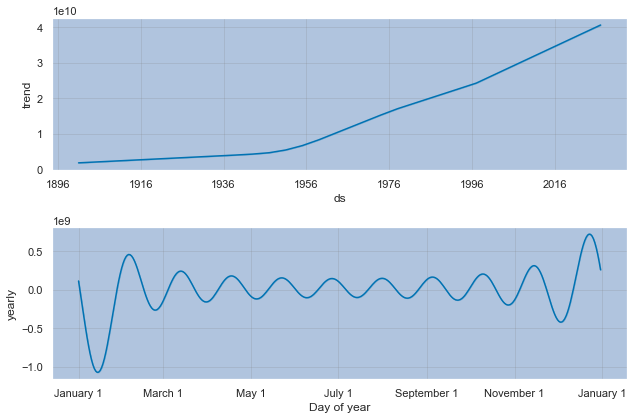

In [458]:
# Plot the components of the forecast
model.plot_components(forecast)

In [459]:
from prophet.diagnostics import cross_validation

df_cv = cross_validation(model, initial='730 days', period='180 days', horizon = '365 days')

  0%|          | 0/240 [00:00<?, ?it/s]

15:12:41 - cmdstanpy - INFO - Chain [1] start processing
15:12:52 - cmdstanpy - INFO - Chain [1] done processing
15:12:53 - cmdstanpy - INFO - Chain [1] start processing
15:13:03 - cmdstanpy - INFO - Chain [1] done processing
15:13:04 - cmdstanpy - INFO - Chain [1] start processing
15:13:15 - cmdstanpy - INFO - Chain [1] done processing
15:13:16 - cmdstanpy - INFO - Chain [1] start processing
15:13:27 - cmdstanpy - INFO - Chain [1] done processing
15:13:28 - cmdstanpy - INFO - Chain [1] start processing
15:13:29 - cmdstanpy - INFO - Chain [1] done processing
15:13:30 - cmdstanpy - INFO - Chain [1] start processing
15:13:30 - cmdstanpy - INFO - Chain [1] done processing
15:13:31 - cmdstanpy - INFO - Chain [1] start processing
15:13:31 - cmdstanpy - INFO - Chain [1] done processing
15:13:32 - cmdstanpy - INFO - Chain [1] start processing
15:13:32 - cmdstanpy - INFO - Chain [1] done processing
15:13:33 - cmdstanpy - INFO - Chain [1] start processing
15:13:33 - cmdstanpy - INFO - Chain [1]

In [460]:
df_cv.head()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1903-12-31,2.104914e+09,2.104884e+09,2.104947e+09,2.254095e+09,1903-03-21
1,1903-12-31,2.104914e+09,2.104866e+09,2.104957e+09,2.254095e+09,1903-09-17
2,1904-12-30,2.442075e+09,2.393115e+09,2.493619e+09,2.279749e+09,1904-03-15
3,1904-12-30,2.442075e+09,2.397138e+09,2.490937e+09,2.279749e+09,1904-09-11
4,1905-12-31,1.971170e+09,1.930304e+09,2.010286e+09,2.427313e+09,1905-03-10


In [461]:
from prophet.diagnostics import performance_metrics

df_p = performance_metrics(df_cv)
print(df_p)

     horizon           mse          rmse           mae      mape     mdape  \
0    41 days  5.883474e+17  7.670381e+08  6.531968e+08  0.084020  0.054245   
1    43 days  5.693810e+17  7.545734e+08  6.433335e+08  0.083368  0.052789   
2    44 days  5.626248e+17  7.500832e+08  6.393528e+08  0.081146  0.052789   
3    46 days  5.623909e+17  7.499273e+08  6.387330e+08  0.080870  0.049480   
4    48 days  5.493759e+17  7.411990e+08  6.290049e+08  0.080312  0.049480   
..       ...           ...           ...           ...       ...       ...   
204 359 days  1.206779e+18  1.098535e+09  7.685292e+08  0.063025  0.051230   
205 361 days  1.219304e+18  1.104221e+09  7.747605e+08  0.063218  0.052174   
206 362 days  1.251584e+18  1.118742e+09  8.050350e+08  0.067469  0.053198   
207 364 days  1.253186e+18  1.119458e+09  8.131842e+08  0.069802  0.055094   
208 365 days  1.286299e+18  1.134151e+09  8.313701e+08  0.070258  0.055094   

        smape  coverage  
0    0.085065  0.333333  
1    0.0844

In [462]:
model.plot_diagnostics(forecast)

AttributeError: 'Prophet' object has no attribute 'plot_diagnostics'

In [ ]:
import statsmodels.api as sm

# Load data
data = pd.read_csv("emissions_data.csv")

# Add a constant to the data
data = sm.add_constant(data)

# Define the independent and dependent variables
y = data["emissions"]
X = data[["year","gdp","gdp_per_capita","population","continent"]]

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())